In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [35]:
from google.colab  import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [36]:
human_df = pd.read_table('/content/drive/MyDrive/Human_Genome_SequencingProject/human.txt')
human_df
chimp_df = pd.read_table('/content/drive/MyDrive/Human_Genome_SequencingProject/chimpanzee.txt')
chimp_df
dog_df = pd.read_table('/content/drive/MyDrive/Human_Genome_SequencingProject/dog.txt')
dog_df

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


In [37]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

human_df['words'] = human_df.apply(lambda x: getKmers(x['sequence']), axis=1)
human_df = human_df.drop('sequence', axis=1)
chimp_df['words'] = chimp_df.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_df = chimp_df.drop('sequence', axis=1)
dog_df['words'] = dog_df.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_df = dog_df.drop('sequence', axis=1)

human_df

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [38]:
human_texts = list(human_df['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_df.iloc[:, 0].values

chimp_texts = list(chimp_df['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_df.iloc[:, 0].values

dog_texts = list(dog_df['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_df.iloc[:, 0].values

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [40]:
ex.pie(human_df,names='class',title='Propotion Of Human Classes',hole=0.33)

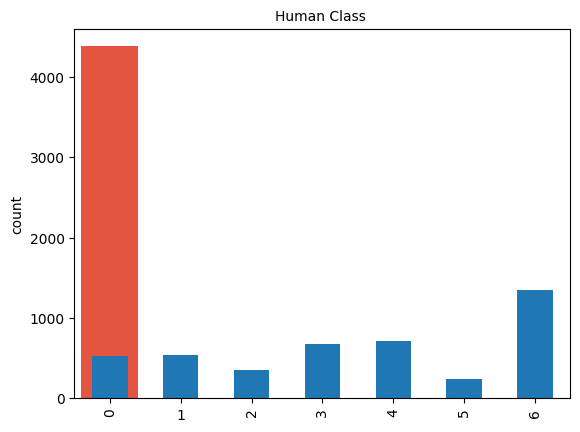

In [41]:
sns.countplot(human_df["class"], palette='CMRmap')
human_df['class'].value_counts().sort_index().plot.bar()
plt.title("Human Class ",fontsize=10)
plt.show()

In [42]:
ex.pie(dog_df,names='class',title='Propotion Of Dog Classes',hole=0.33)

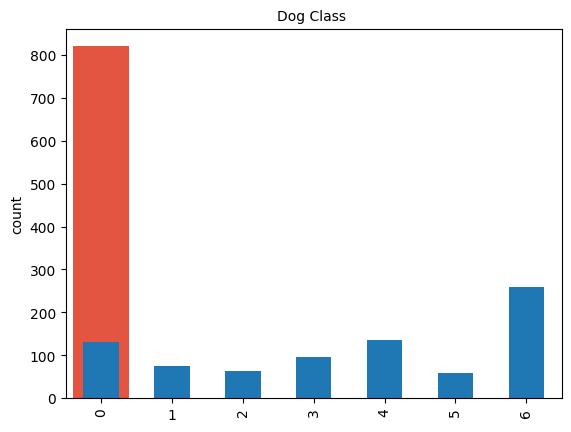

In [43]:
sns.countplot(dog_df["class"], palette='CMRmap')
dog_df['class'].value_counts().sort_index().plot.bar()
plt.title("Dog Class ",fontsize=10)
plt.show()

In [44]:
ex.pie(chimp_df,names='class',title='Propotion Of Chimpanzee Classes',hole=0.33)

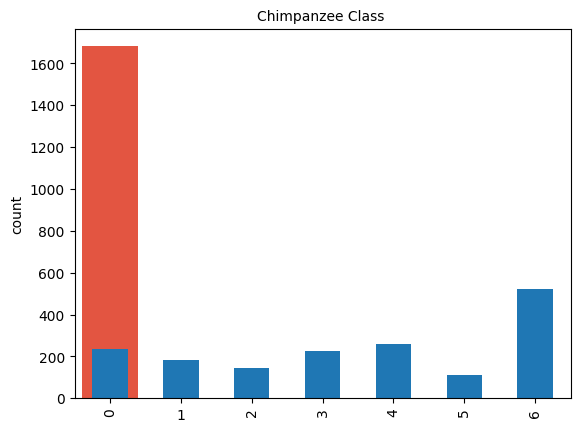

In [45]:
sns.countplot(chimp_df["class"], palette='CMRmap')
chimp_df['class'].value_counts().sort_index().plot.bar()
plt.title("Chimpanzee Class ",fontsize=10)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

In [50]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(X_train,y_train)
predicted = svm_clf.predict(X_test)
score = svm_clf.score(X_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.806


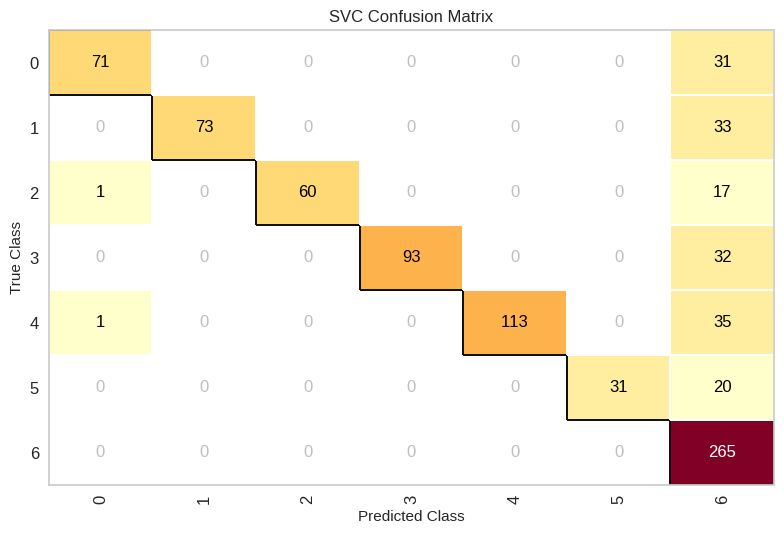

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [51]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

svm_cm = ConfusionMatrix(svm_clf, classes=['0','1','2', "3","4","5","6"])

svm_cm.fit(X_train, y_train)
svm_cm.score(X_test, y_test)
svm_cm.show()

In [52]:

# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_data,
                                                    test_size = 0.20,
                                                    random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [54]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [59]:
models = []
models.append(('MultinomiaNB', MultinomialNB()))

results = []
names = []

for name, model in models:

    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model,
                               X_train,
                               y_train,
                               cv=kfold,
                               scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("cv_results", cv_results)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

cv_results [0.96004566 0.93835616 0.97146119 0.94977169]
MultinomiaNB: 0.954909 (0.012255)



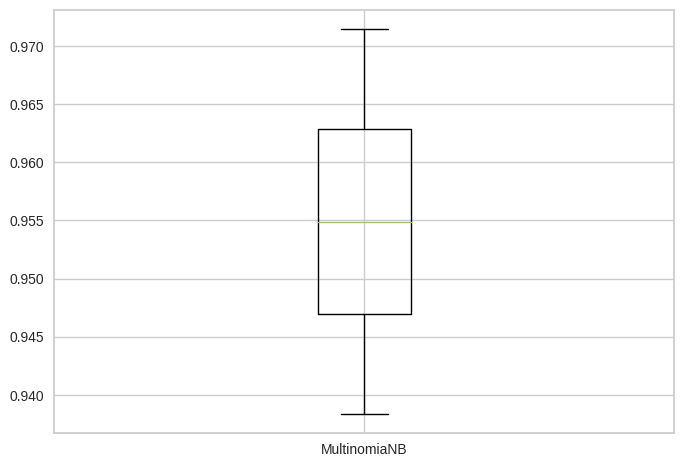

In [60]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.show()